In [1]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt

import normalize
import ocr

In [27]:
IMAGE = "images/Blue.JPG"
USE_GPU = False
original_image = normalize.load_image(IMAGE)

# Normalize Image
bbox, warped = normalize.normalize(IMAGE)
# Apply OCR
name = ocr.get_card_name(warped, USE_GPU)

In [55]:
def score_pair(im1, im2):
    result = np.sum(np.abs(im1 - im2))
    return result

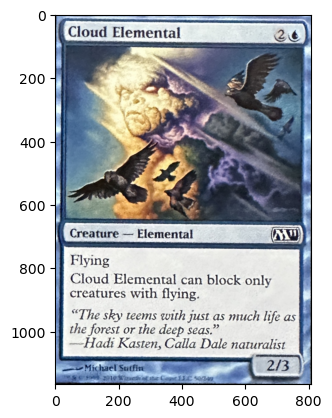

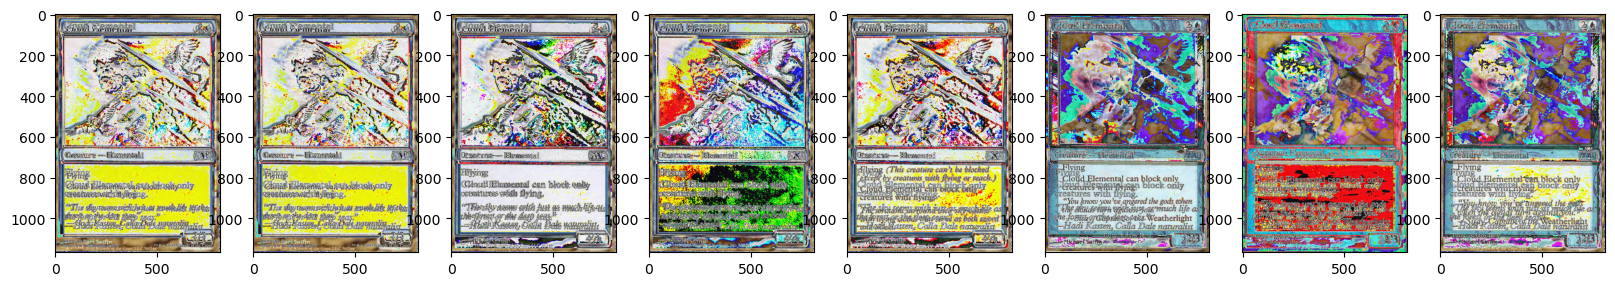

In [62]:
printingssearch = requests.get(f'https://api.scryfall.com/cards/named?fuzzy={name}').json()['prints_search_uri']
printings = requests.get(printingssearch).json()['data']

printings = [printing for printing in printings if 'paper' in printing['games']]

min_cc = np.inf
best_match = None
best_image = None

plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
plt.show()

plt.figure(figsize=(20, 5))
for printing in printings:
    plt.subplot(1, len(printings), printings.index(printing)+1)
    image_url = printing['image_uris']['border_crop']
    image = cv2.imdecode(np.frombuffer(requests.get(image_url).content, np.uint8), cv2.IMREAD_COLOR)
    image = cv2.resize(image, (warped.shape[1], warped.shape[0]))
    score = score_pair(warped, image)

    if score < min_cc:
        min_cc = score
        best_match = printing
        best_image = image

    plt.imshow(cv2.cvtColor(image - warped, cv2.COLOR_BGR2RGB))

plt.show()

Cloud Elemental
https://api.scryfall.com/cards/search?order=released&q=oracleid%3A0b751cc7-3a19-4207-9e64-83e18d279588&unique=prints
Magic 2011
50


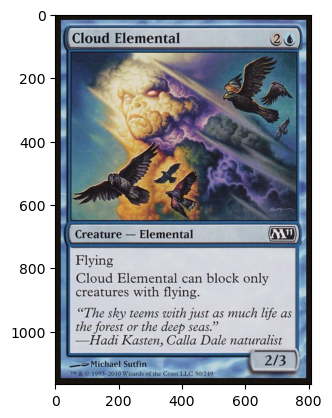

In [64]:
print(best_match['name'])
print(printingssearch)
print(best_match['set_name'])
print(best_match['collector_number'])
plt.imshow(cv2.cvtColor(best_image, cv2.COLOR_BGR2RGB))
plt.show()